In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Define binary pixel patterns for letters A, B, and C
# Each is a 5x6 grid, flattened into a 1D array (length 30)

A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,0]
]).flatten()

C = np.array([
    [0,1,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,1,1,1,1]
]).flatten()

# Input data matrix (3 samples, each of 30 pixels)
X = np.array([A, B, C])

# One-hot encoded labels: A=[1,0,0], B=[0,1,0], C=[0,0,1]
Y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])


In [10]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Softmax function for the output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # for numerical stability
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))  # add small epsilon to avoid log(0)


In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Define layer sizes
input_size = 30      # 5x6 image flattened
hidden_size = 16     # Hidden layer neurons
output_size = 3      # 3 classes: A, B, C

# Initialize weights and biases with small random values
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [ ]:
learning_rate = 0.1
epochs = 500
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # Loss
    loss = cross_entropy_loss(Y, A2)
    losses.append(loss)

    # Backpropagation
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print progress
    if epoch % 50 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")


Epoch 0 - Loss: 3.9095
Epoch 50 - Loss: 0.0641
Epoch 100 - Loss: 0.0316
Epoch 150 - Loss: 0.0207
Epoch 200 - Loss: 0.0153
Epoch 250 - Loss: 0.0121
Epoch 300 - Loss: 0.0100
Epoch 350 - Loss: 0.0085
Epoch 400 - Loss: 0.0074
Epoch 450 - Loss: 0.0066


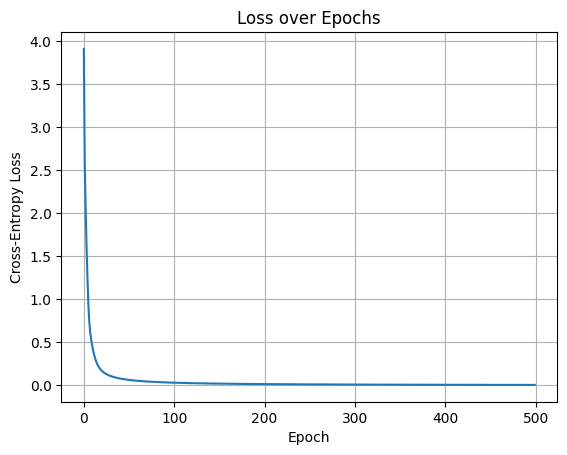

In [12]:
# Plot loss over time to check training progress
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()


True: A, Predicted: C


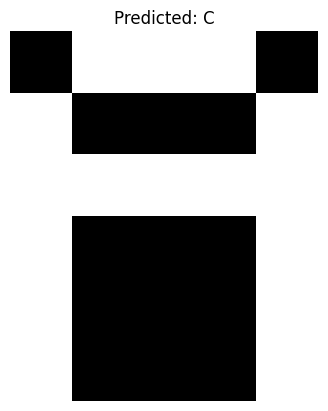

True: B, Predicted: C


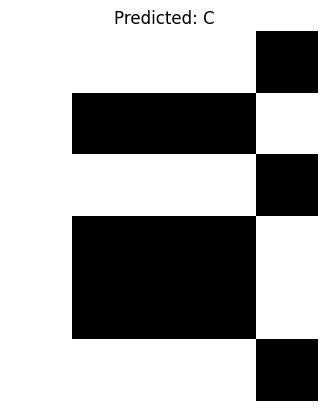

True: C, Predicted: C


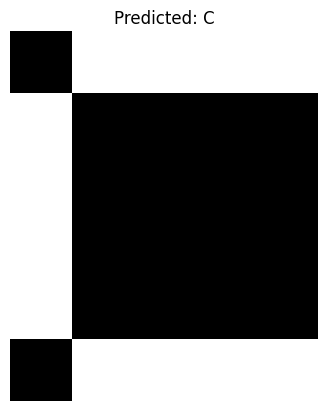

In [13]:
# Prediction function
def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return np.argmax(a2, axis=1)

# Display predictions with images
for i, img in enumerate(X):
    img_reshaped = img.reshape(6, 5)  # reshape to original 6x5 image
    pred = predict(img.reshape(1, -1))  # reshape for single sample
    true_label = ['A', 'B', 'C'][i]
    pred_label = ['A', 'B', 'C'][pred[0]]

    print(f"True: {true_label}, Predicted: {pred_label}")
    plt.imshow(img_reshaped, cmap='gray')
    plt.title(f"Predicted: {pred_label}")
    plt.axis('off')
    plt.show()
